### Data Visualization in R

Data visualization is a key part of data analysis, allowing you to understand patterns, relationships, and insights within data. R provides robust tools for creating visualizations, including basic plotting functions and powerful packages like **ggplot2** for advanced plotting. Here, we’ll go over base R plotting and cover more advanced features with `ggplot2`.

---

### **1. Basic Plotting in Base R**

R includes built-in functions for basic plots like scatter plots, bar charts, histograms, boxplots, and more. These are ideal for quick exploratory data analysis.

#### **Scatter Plot**
A scatter plot is used to observe relationships between two continuous variables.


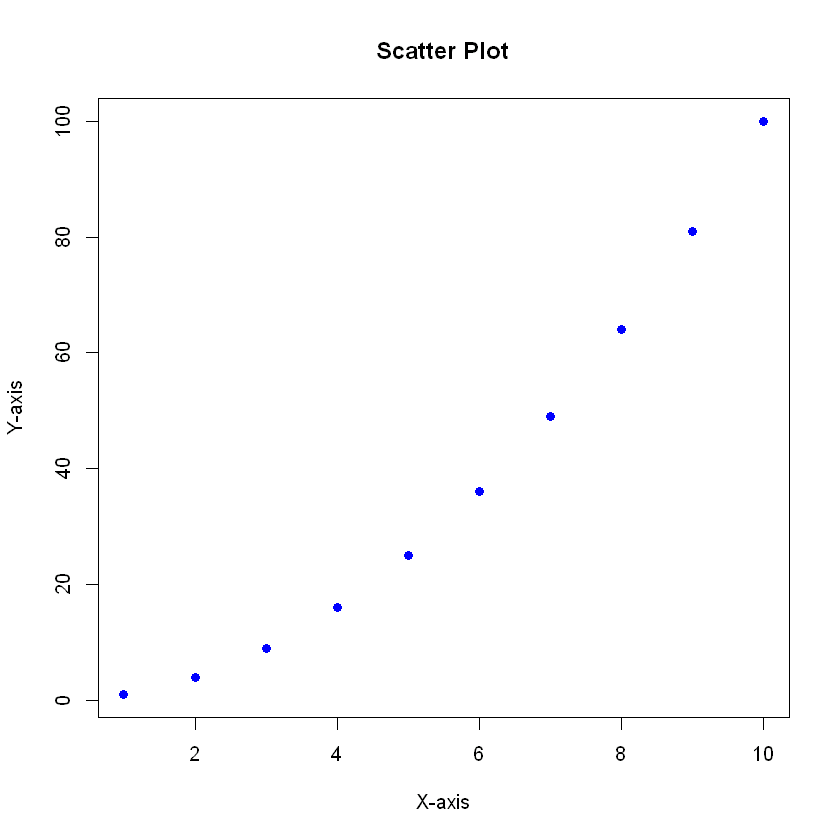

In [1]:
# Sample data
x <- 1:10
y <- x^2

# Scatter plot
plot(x, y, main = "Scatter Plot", xlab = "X-axis", ylab = "Y-axis", col = "blue", pch = 16)

- `main`: Sets the main title.
- `xlab`/`ylab`: Labels the x- and y-axes.
- `col`: Changes color of points.
- `pch`: Specifies the shape of points.

#### **Line Plot**
Line plots are useful for time-series data or any ordered data.

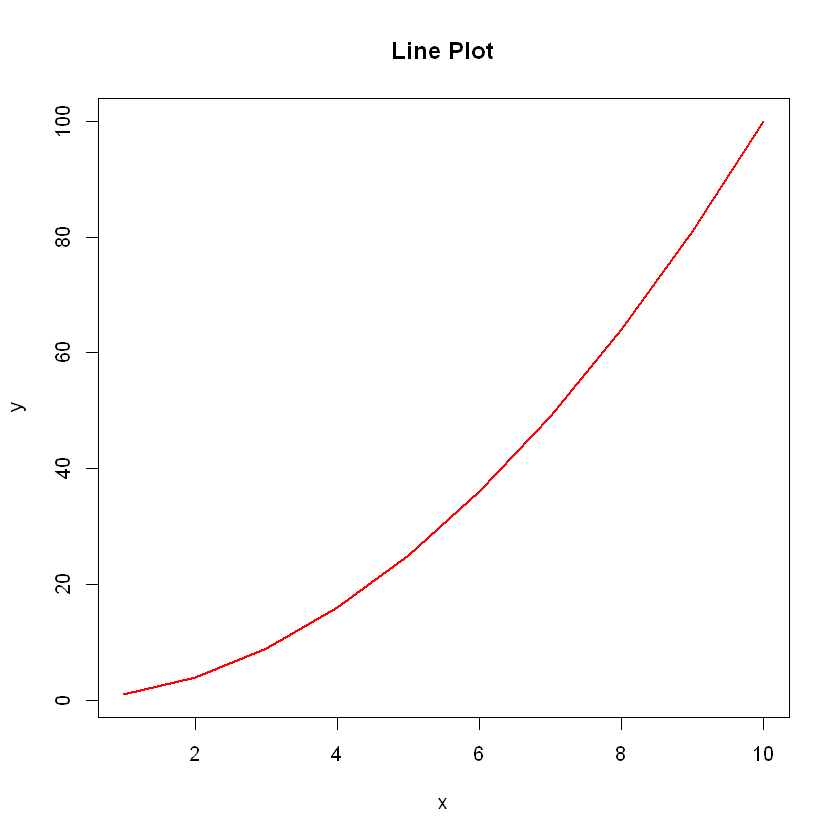

In [2]:

plot(x, y, type = "l", main = "Line Plot", col = "red", lwd = 2)


- `type = "l"`: Creates a line plot.
- `lwd`: Specifies line width.

#### **Histogram**
A histogram is used to visualize the distribution of a single continuous variable.

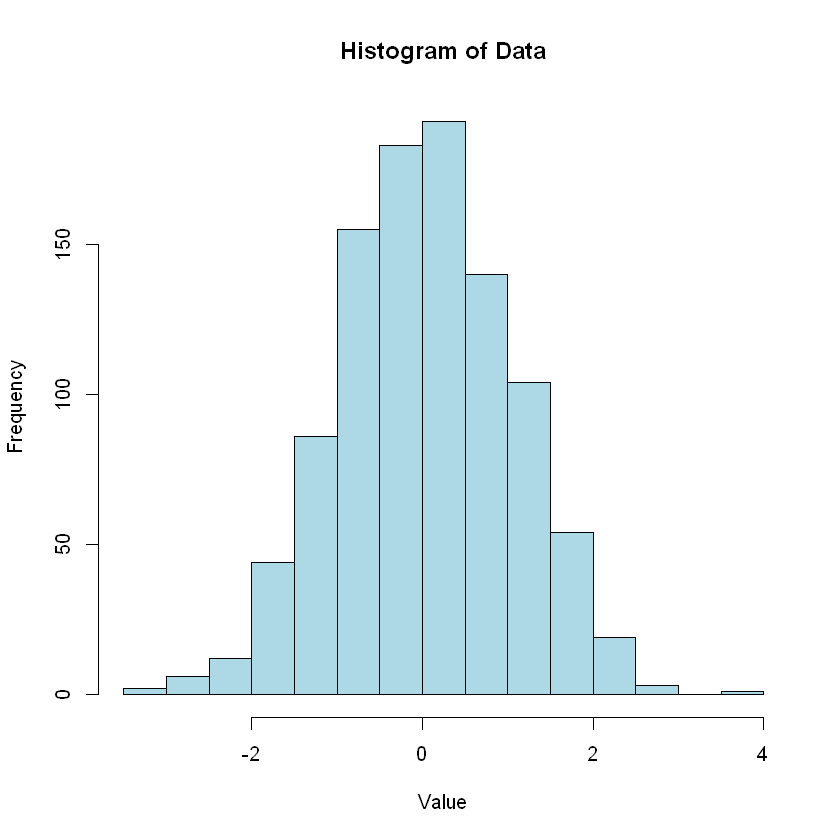

In [3]:
data <- rnorm(1000)
hist(data, main = "Histogram of Data", xlab = "Value", col = "lightblue", border = "black")

- `col`: Sets bar color.
- `border`: Sets bar border color.

#### **Boxplot**
Boxplots are useful for visualizing the spread and skewness of data, especially across different groups.

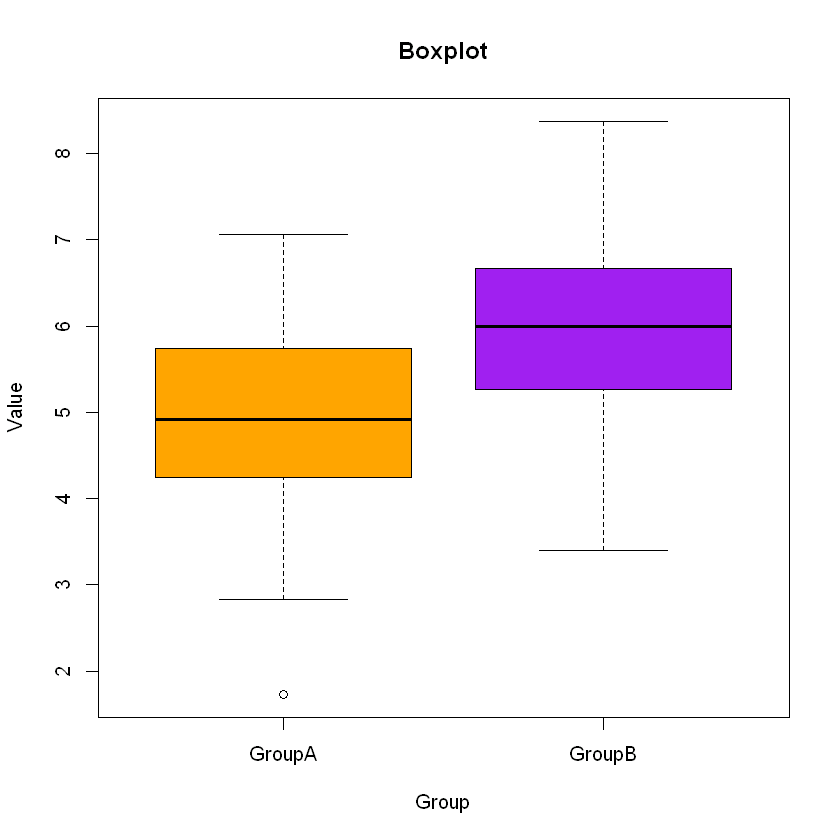

In [4]:

data <- list(GroupA = rnorm(50, mean = 5), GroupB = rnorm(50, mean = 6))
boxplot(data, main = "Boxplot", xlab = "Group", ylab = "Value", col = c("orange", "purple"))


#### **Bar Plot**
Bar plots are useful for categorical data.

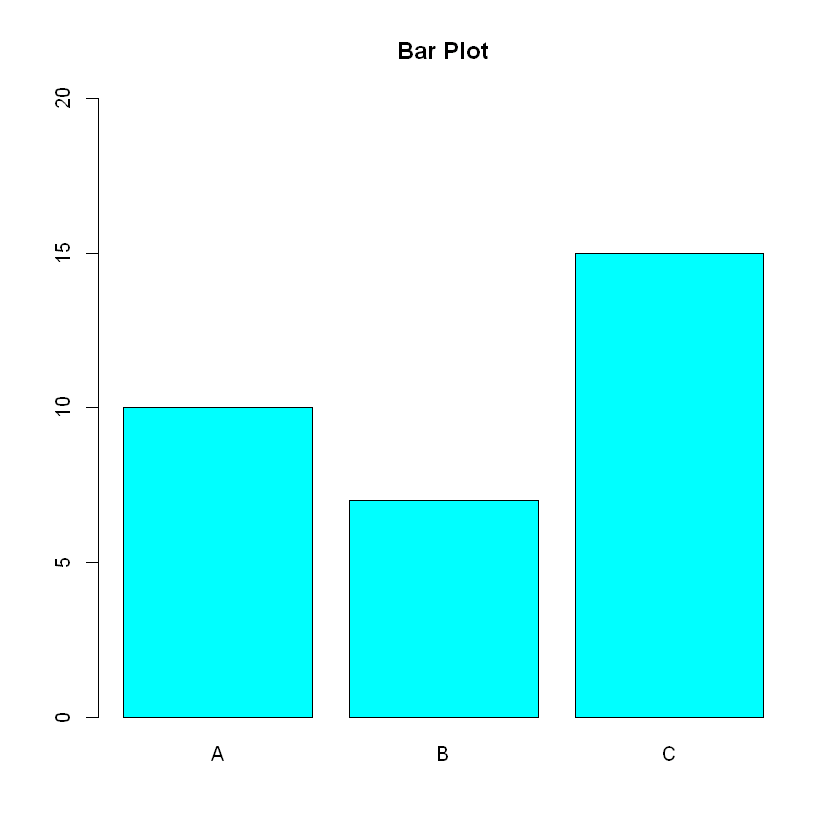

In [5]:

categories <- c("A", "B", "C")
values <- c(10, 7, 15)
barplot(values, names.arg = categories, main = "Bar Plot", col = "cyan", ylim = c(0, 20))


---

### **2. Advanced Plotting with ggplot2**

`ggplot2` is a popular package for data visualization, based on the **Grammar of Graphics**. It provides a powerful and flexible system for creating complex plots.

#### **Installing and Loading ggplot2**

In [7]:
# install.packages("ggplot2")
# library(ggplot2)

#### **Basic Structure of a ggplot2 Plot**
The general structure of a `ggplot2` plot includes:
1. **Data**: The dataset used.
2. **Aesthetic Mapping (aes)**: Specifies how variables are mapped to visual properties.
3. **Geometric Object (geom)**: The type of plot (e.g., points, lines, bars).
4. **Layers**: Different elements that can be added to the plot.

#### **Scatter Plot with ggplot2**

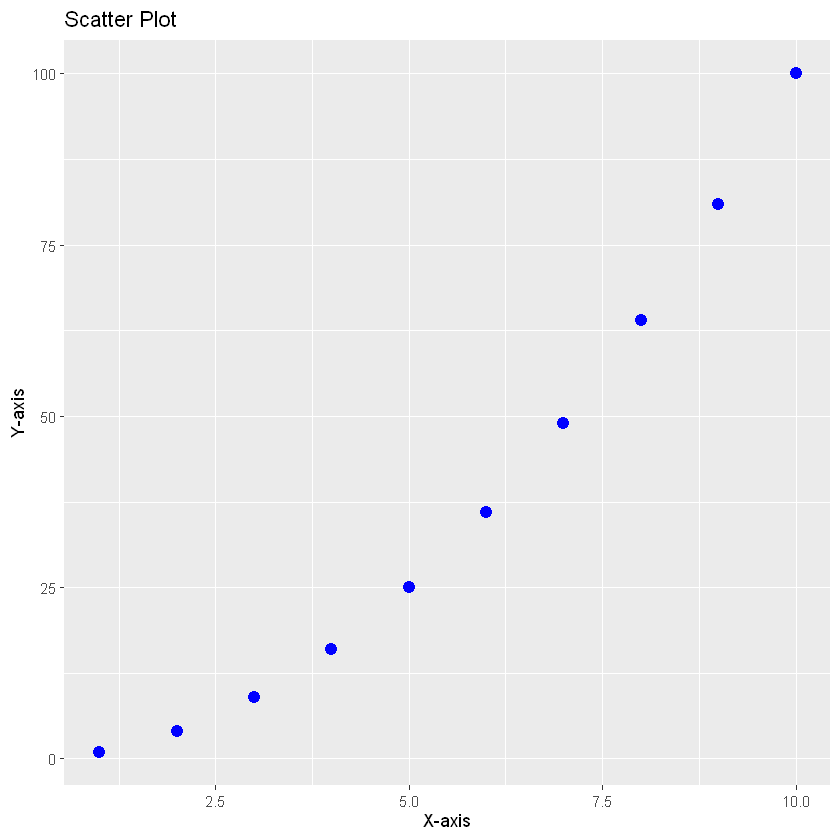

In [8]:

# Sample data
df <- data.frame(x = 1:10, y = (1:10)^2)

# Scatter plot
ggplot(df, aes(x = x, y = y)) +
  geom_point(color = "blue", size = 3) +
  labs(title = "Scatter Plot", x = "X-axis", y = "Y-axis")


#### **Line Plot with ggplot2**

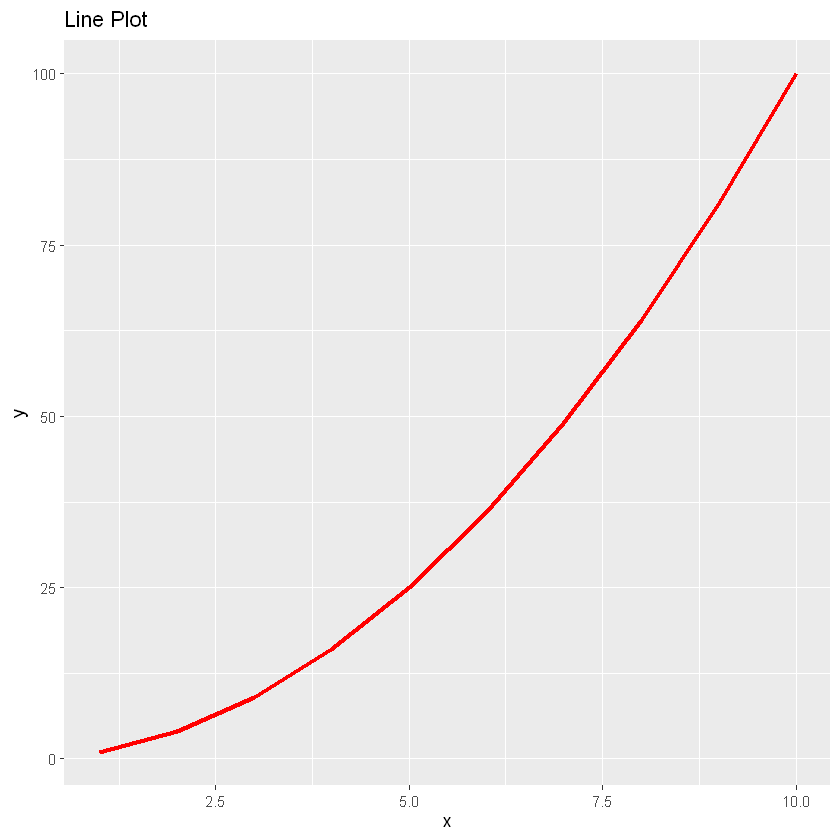

In [10]:
ggplot(df, aes(x = x, y = y)) + geom_line(color = "red", size = 1.2) + labs(title = "Line Plot")


#### **Histogram with ggplot2**

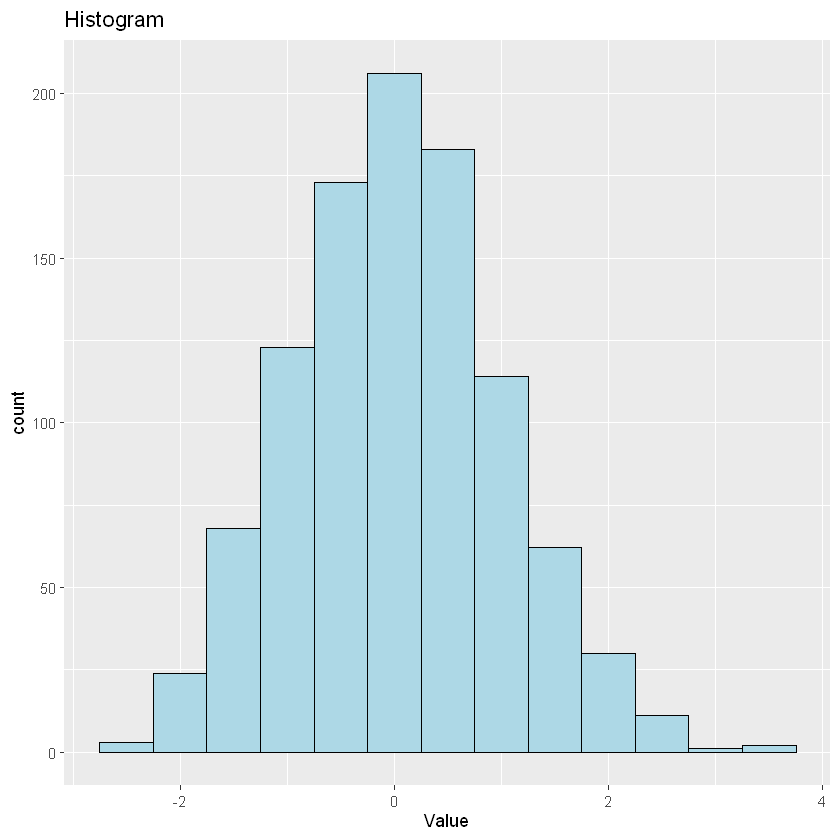

In [11]:
data <- data.frame(value = rnorm(1000))
ggplot(data, aes(x = value)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  labs(title = "Histogram", x = "Value")


#### **Boxplot with ggplot2**

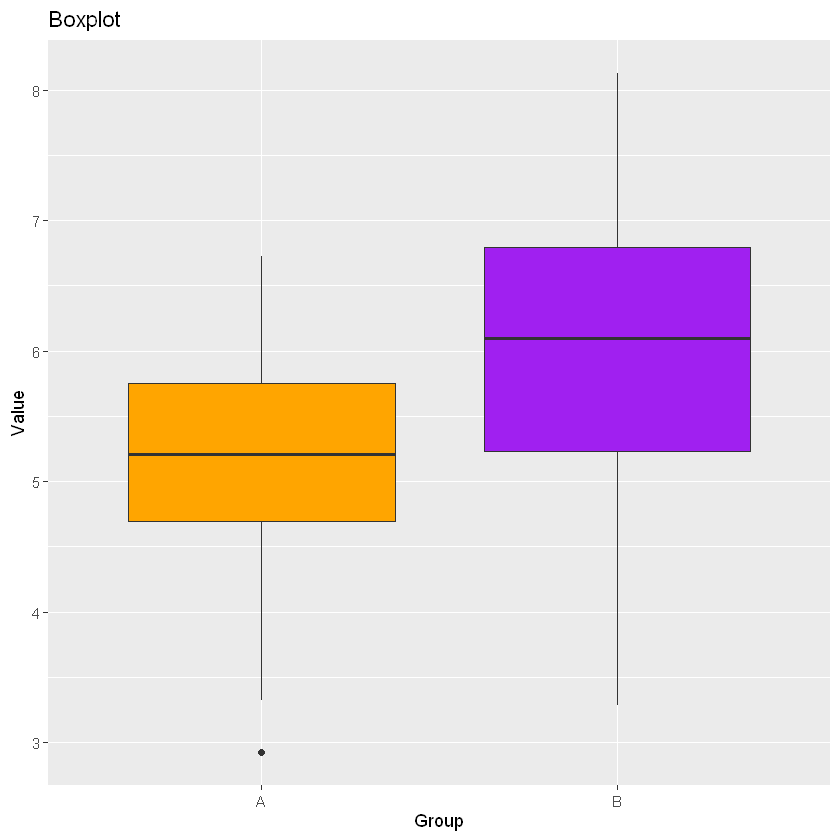

In [12]:

data <- data.frame(group = rep(c("A", "B"), each = 50), value = c(rnorm(50, 5), rnorm(50, 6)))
ggplot(data, aes(x = group, y = value)) +
  geom_boxplot(fill = c("orange", "purple")) +
  labs(title = "Boxplot", x = "Group", y = "Value")


#### **Bar Plot with ggplot2**

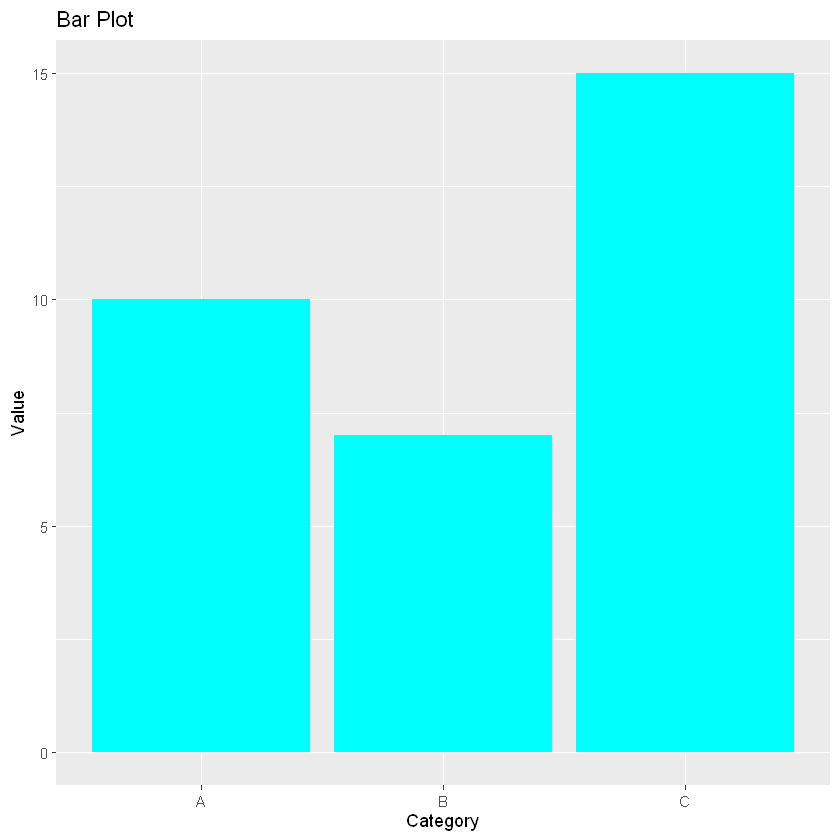

In [13]:

data <- data.frame(category = c("A", "B", "C"), value = c(10, 7, 15))
ggplot(data, aes(x = category, y = value)) +
  geom_bar(stat = "identity", fill = "cyan") +
  labs(title = "Bar Plot", x = "Category", y = "Value")


#### **Customizing ggplot2 Plots**
`ggplot2` allows you to add various customizations to make plots more informative and visually appealing.

- **Themes**: You can customize the overall style.

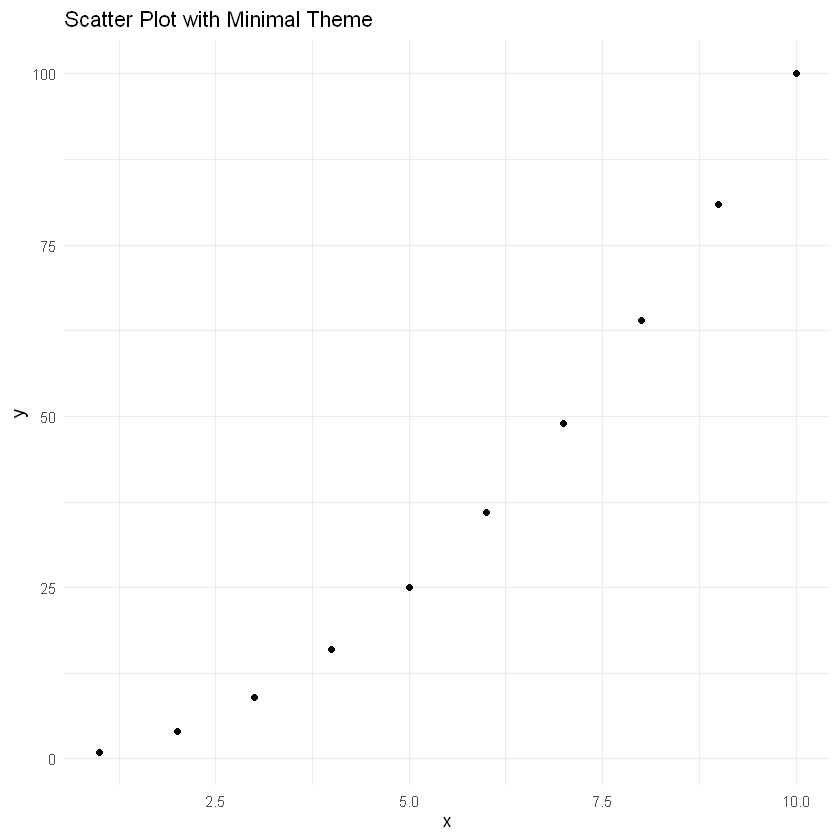

In [16]:

ggplot(df, aes(x = x, y = y)) +
    geom_point() +
    theme_minimal() +
    labs(title = "Scatter Plot with Minimal Theme")


- **Faceting**: Create multiple plots for subsets of the data.

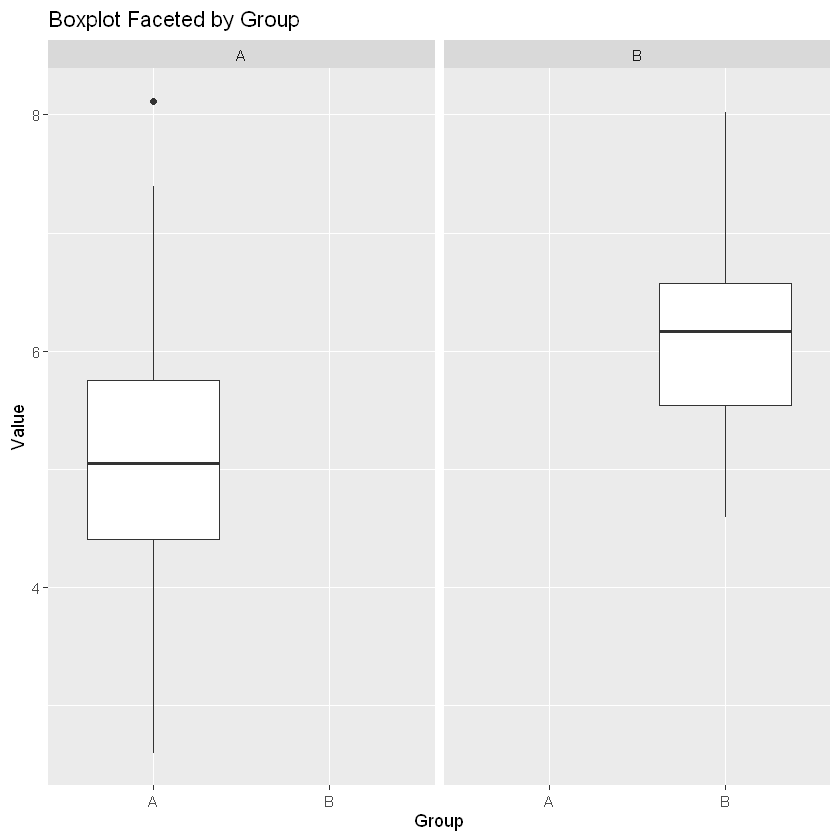

In [25]:
# Sample data with a 'group' column
data <- data.frame(group = rep(c("A", "B"), each = 50),
                   value = c(rnorm(50, mean = 5), rnorm(50, mean = 6)))

# Plot using ggplot2 with facet_wrap for each group
ggplot(data, aes(x = group, y = value)) +
  geom_boxplot() +
  facet_wrap(~ group) +
  labs(title = "Boxplot Faceted by Group", x = "Group", y = "Value")


- **Adding Labels**: Customize axis labels and titles.

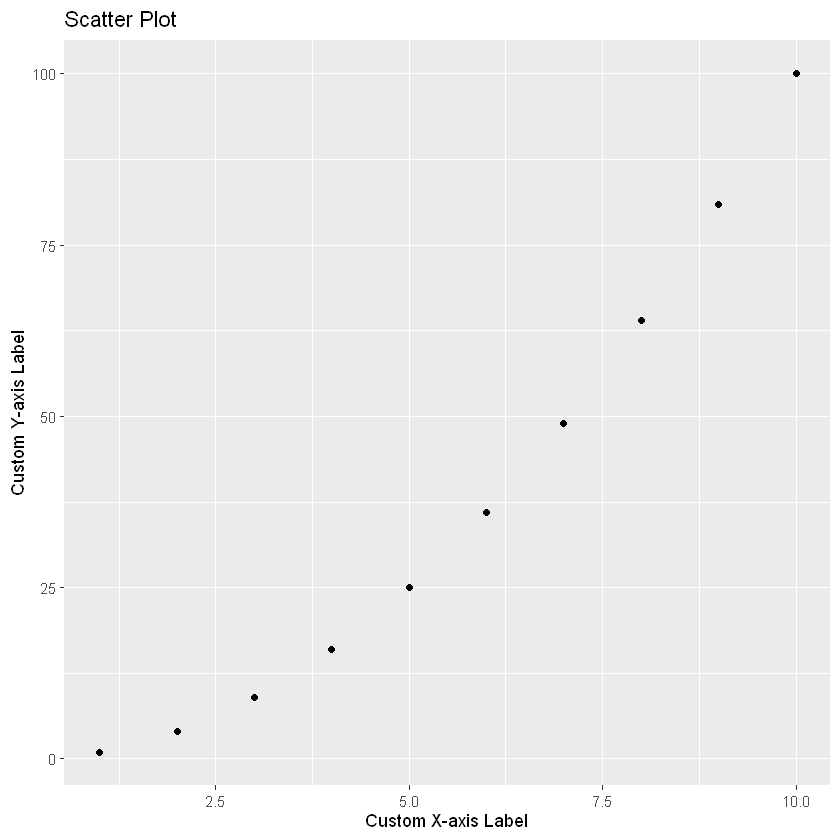

In [26]:
ggplot(df, aes(x = x, y = y)) +
    geom_point() +
    labs(title = "Scatter Plot", x = "Custom X-axis Label", y = "Custom Y-axis Label")


---

### **3. Specialized Plot Types with ggplot2**

#### **Density Plot**
A density plot is used to visualize the distribution of a continuous variable.

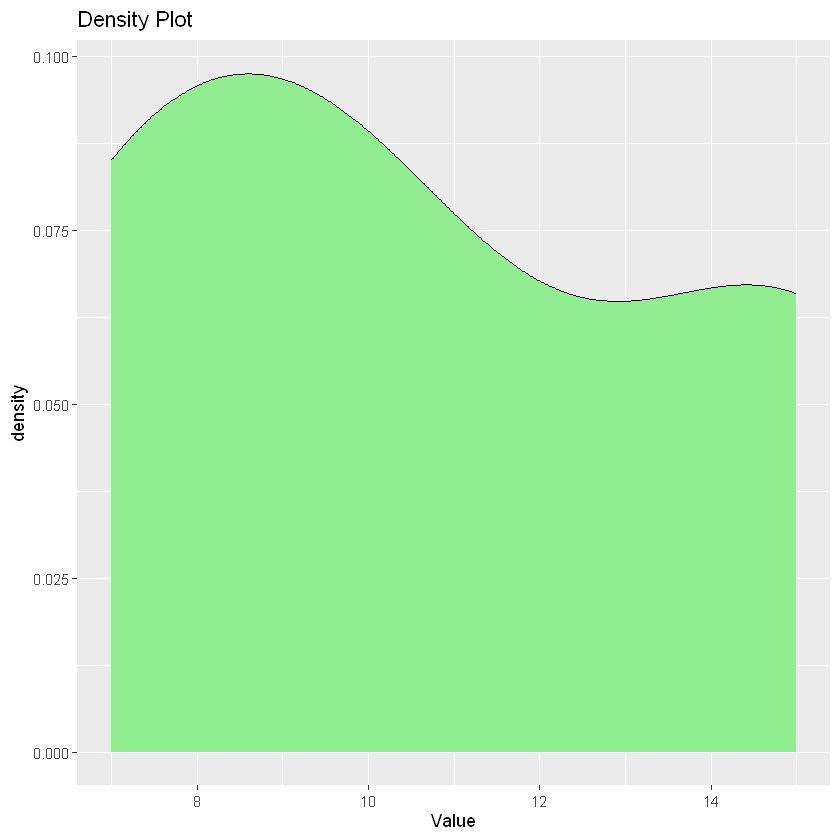

In [20]:

ggplot(data, aes(x = value)) +
  geom_density(fill = "lightgreen") +
  labs(title = "Density Plot", x = "Value")


#### **Violin Plot**
Violin plots combine boxplots and density plots to show distribution and summary statistics.

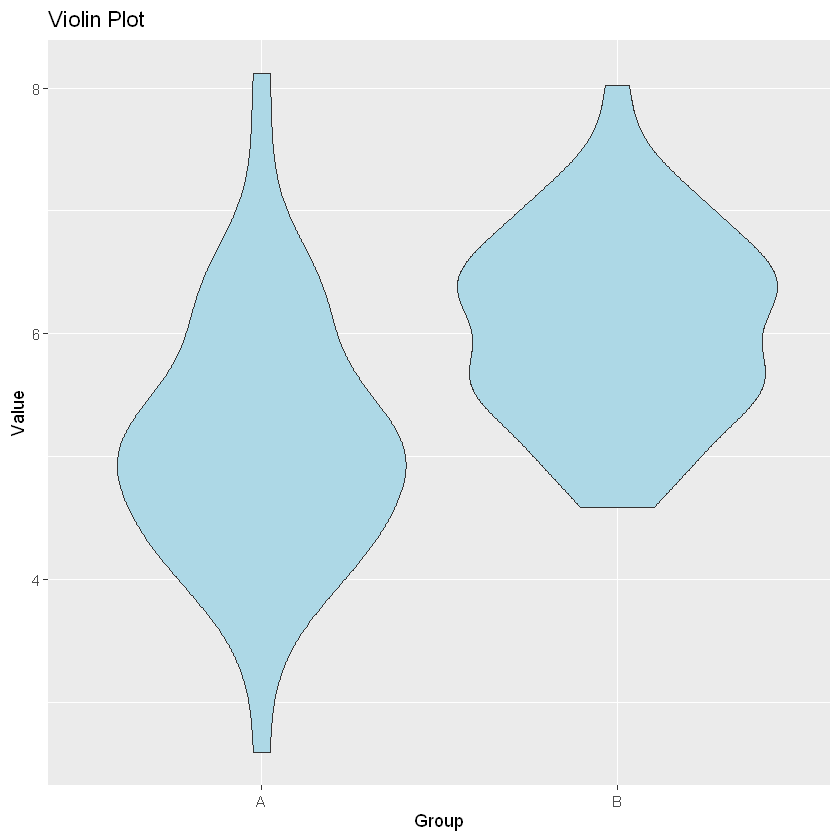

In [28]:
ggplot(data, aes(x = group, y = value)) +
  geom_violin(fill = "lightblue") +
  labs(title = "Violin Plot", x = "Group", y = "Value")


#### **Heatmap**
Heatmaps are useful for visualizing data density across two dimensions.

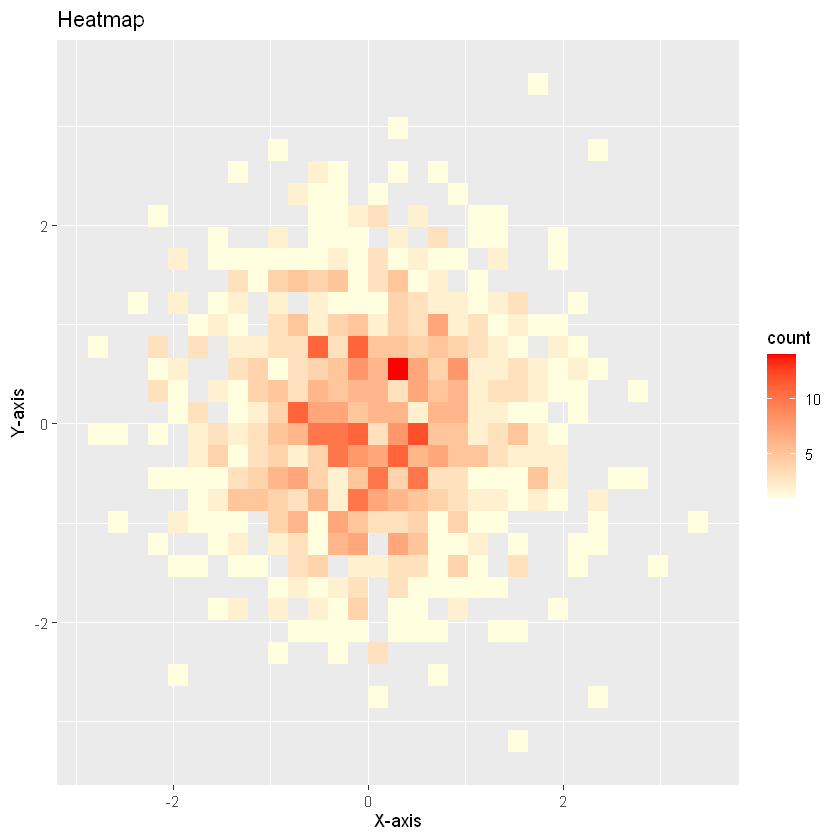

In [24]:

data <- data.frame(x = rnorm(1000), y = rnorm(1000))
ggplot(data, aes(x = x, y = y)) +
  geom_bin2d(bins = 30) +
  labs(title = "Heatmap", x = "X-axis", y = "Y-axis") +
  scale_fill_gradient(low = "lightyellow", high = "red")


#### **Boxplot with Jitter**
Combining boxplots with jittered points is helpful for visualizing individual data points alongside summary statistics.

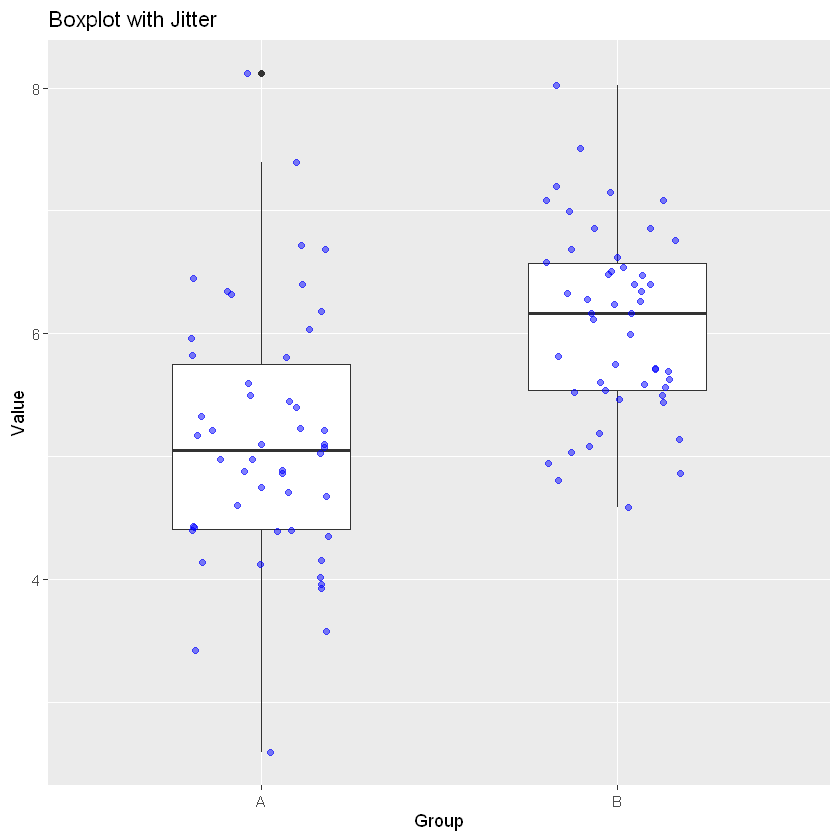

In [29]:

ggplot(data, aes(x = group, y = value)) +
  geom_boxplot(width = 0.5) +
  geom_jitter(width = 0.2, color = "blue", alpha = 0.5) +
  labs(title = "Boxplot with Jitter", x = "Group", y = "Value")


---

### **4. Saving and Exporting Plots**

To save `ggplot2` plots, use the `ggsave()` function, which allows you to specify the filename, width, height, and resolution.

In [30]:

# Save a plot as a PNG file
ggsave("scatter_plot.png", width = 5, height = 4, dpi = 300)


---

### **5. Other Visualization Packages in R**

While `ggplot2` is very versatile, there are other useful packages:
- **lattice**: Provides advanced data visualization with features like trellis graphics for multivariate data.
- **plotly**: For interactive plots that can be embedded in web applications.
- **shiny**: To create interactive web applications for data analysis.

---